Vertices: 1, Edges: 0, Time taken: 0.00000 ms
Vertices: 2, Edges: 0, Time taken: 0.00000 ms
Vertices: 3, Edges: 1, Time taken: 0.00000 ms
Vertices: 4, Edges: 2, Time taken: 0.00000 ms
Vertices: 5, Edges: 4, Time taken: 0.00000 ms
Vertices: 6, Edges: 6, Time taken: 0.00000 ms
Vertices: 7, Edges: 8, Time taken: 0.00000 ms
Vertices: 8, Edges: 11, Time taken: 0.00000 ms
Vertices: 9, Edges: 14, Time taken: 0.00000 ms
Vertices: 10, Edges: 18, Time taken: 0.00000 ms
Vertices: 11, Edges: 22, Time taken: 0.00000 ms
Vertices: 12, Edges: 26, Time taken: 0.00000 ms
Vertices: 13, Edges: 31, Time taken: 0.00000 ms
Vertices: 14, Edges: 36, Time taken: 0.00000 ms
Vertices: 15, Edges: 42, Time taken: 0.00000 ms
Vertices: 16, Edges: 48, Time taken: 0.00000 ms
Vertices: 17, Edges: 54, Time taken: 0.00000 ms
Vertices: 18, Edges: 61, Time taken: 0.00000 ms
Vertices: 19, Edges: 68, Time taken: 0.00000 ms
Vertices: 20, Edges: 76, Time taken: 1.01042 ms
Vertices: 21, Edges: 84, Time taken: 0.00000 ms
Vertices

Vertices: 171, Edges: 5814, Time taken: 6.55460 ms
Vertices: 172, Edges: 5882, Time taken: 5.84054 ms
Vertices: 173, Edges: 5951, Time taken: 4.59528 ms
Vertices: 174, Edges: 6020, Time taken: 5.19466 ms
Vertices: 175, Edges: 6090, Time taken: 6.04224 ms
Vertices: 176, Edges: 6160, Time taken: 5.32055 ms
Vertices: 177, Edges: 6230, Time taken: 5.50580 ms
Vertices: 178, Edges: 6301, Time taken: 5.11336 ms
Vertices: 179, Edges: 6372, Time taken: 4.99558 ms
Vertices: 180, Edges: 6444, Time taken: 6.09660 ms
Vertices: 181, Edges: 6516, Time taken: 7.19285 ms
Vertices: 182, Edges: 6588, Time taken: 7.65252 ms
Vertices: 183, Edges: 6661, Time taken: 4.95267 ms
Vertices: 184, Edges: 6734, Time taken: 5.02396 ms
Vertices: 185, Edges: 6808, Time taken: 6.00100 ms
Vertices: 186, Edges: 6882, Time taken: 6.04224 ms
Vertices: 187, Edges: 6956, Time taken: 6.92844 ms
Vertices: 188, Edges: 7031, Time taken: 5.24402 ms
Vertices: 189, Edges: 7106, Time taken: 7.05385 ms
Vertices: 190, Edges: 7182, Tim

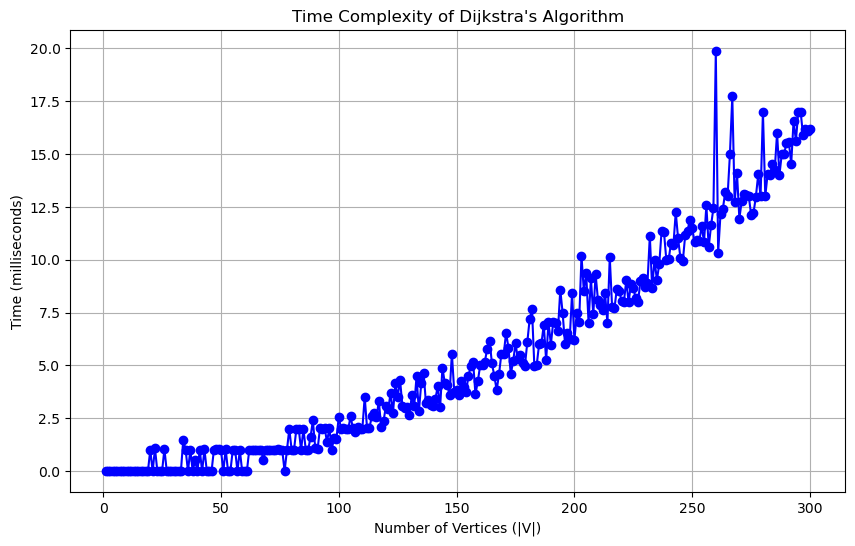

In [9]:
import sys
import time
import random
import matplotlib.pyplot as plt

# Dijkstra's algorithm implementation
def dijkstra(graph, V, start_vertex):
    distance = [sys.maxsize] * V
    visited = [False] * V
    distance[start_vertex] = 0
    priority_queue = list(range(V))
    queue_size = V

    while queue_size > 0:
        min_distance = sys.maxsize
        min_index = -1

        for i in range(queue_size):
            vertex = priority_queue[i]
            if not visited[vertex] and distance[vertex] < min_distance:
                min_distance = distance[vertex]
                min_index = i

        if min_index == -1:
            break

        u = priority_queue[min_index]
        priority_queue[min_index] = priority_queue[queue_size - 1]
        queue_size -= 1
        visited[u] = True

        for v in range(V):
            if not visited[v] and graph[u][v] != 0 and distance[u] != sys.maxsize:
                if distance[u] + graph[u][v] < distance[v]:
                    distance[v] = distance[u] + graph[u][v]

    return distance

# Generate a random graph with V vertices and E edges
def generate_graph(V, E):
    graph = [[0 for _ in range(V)] for _ in range(V)]
    edges_added = 0
    while edges_added < E:
        u = random.randint(0, V - 1)
        v = random.randint(0, V - 1)
        if u != v and graph[u][v] == 0:
            weight = random.randint(1, 10)
            graph[u][v] = weight
            edges_added += 1
    return graph

# Empirical time complexity analysis and graph plotting
def analyze_and_plot_time_complexity():
    vertices_list = list(range(1, 301))  # Different sizes of V 
    edge_density = 0.2  # Fixed edge density (E = V * (V - 1) * density)
    times = []  # Store the time for each graph size

    for V in vertices_list:
        E = int(V * (V - 1) * edge_density)  # Number of edges based on density
        graph = generate_graph(V, E)  # Generate a random graph with V vertices and E edges
        
        start_vertex = 0  # Always use vertex 0 as the starting point
        start_time = time.time()  # Record the start time
        dijkstra(graph, V, start_vertex)  # Run Dijkstra's algorithm
        end_time = time.time()  # Record the end time

        elapsed_time = (end_time - start_time) * 1000  # Convert to milliseconds
        times.append(elapsed_time)
        print(f"Vertices: {V}, Edges: {E}, Time taken: {elapsed_time:.5f} ms")

    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(vertices_list, times, marker='o', linestyle='-', color='b')
    plt.title('Time Complexity of Dijkstra\'s Algorithm')
    plt.xlabel('Number of Vertices (|V|)')
    plt.ylabel('Time (milliseconds)')
    plt.grid(True)
    plt.show()

# Run the time complexity analysis and plot the graph
analyze_and_plot_time_complexity()
